# Economic data analysis with Fred and Pandas 
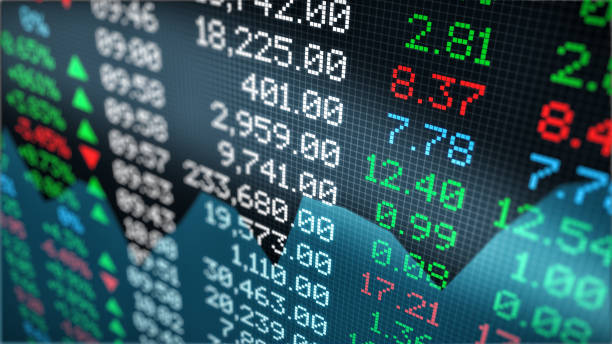
1)Some data scraping ,cleaning,exploration 

2)Using Fredapi data has been collected 

3)using some extra colour paleetes and grids insights are made more specific





# importing files and APiS

In [3]:
!pip install fredapi > /dev/null

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("fivethirtyeight")
import time

pd.set_option('display.max_columns', 500)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()['color']

from fredapi import Fred

2.1 I've hided one cell here because of api key 

In [7]:
fred_key="aaa5cb2ed4b8711cec5633ad91c44ced"

 # Creating a Fred object

In [8]:
fred= Fred(api_key=fred_key)

#  Searching for economic data

In [14]:
sp_search=fred.search('S&P',order_by='popularity')

In [15]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-05-26   2023-05-26   
CSUSHPINSA          CSUSHPINSA     2023-05-26   2023-05-26   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-05-26   2023-05-26   
SP500                    SP500     2023-05-26   2023-05-26   
MEHOINUSA672N    MEHOINUSA672N     2023-05-26   2023-05-26   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-05-24  Daily, Close   
CSUSHPINSA            1987-01-01      2023-02-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-05-24  Daily, Close   
SP500                 2013-05-28      2023-05-25  Daily, Close   
MEHOINUSA672N         1984-01-01      2021-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2021 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-05-25 08:58:06-05:00   
CSUSHPINSA                           NSA  2023-04-25 08:13:02-05:00   
BAMLH0A0HYM2EY                       NSA  2023-05-25 08:58:10-05:00   
SP500                                NSA  2023-05-25 19:10:49-05:00   
MEHOINUSA672N                        NSA  2022-09-13 13:48:01-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           95  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             90  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         84  This data represents the effective yield of th...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          80  Household data are collected as of March.  As ...

# Pull raw data 

In [16]:
sp500=fred.get_series(series_id='SP500')
sp500

2013-05-27        NaN
2013-05-28    1660.06
2013-05-29    1648.36
2013-05-30    1654.41
2013-05-31    1630.74
               ...   
2023-05-19    4191.98
2023-05-22    4192.63
2023-05-23    4145.58
2023-05-24    4115.24
2023-05-25    4151.28
Length: 2609, dtype: float64

<AxesSubplot:title={'center':'S&P 500'}>

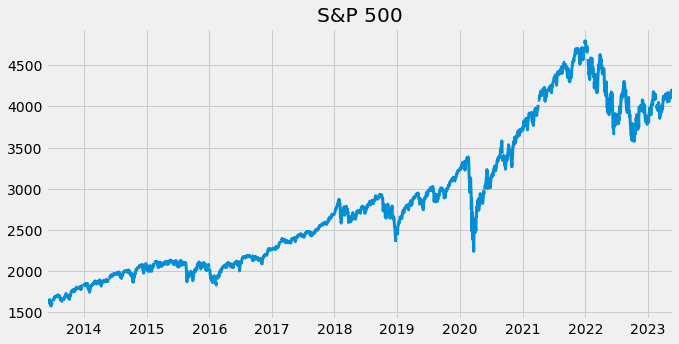

In [19]:
sp500.plot(figsize=(10,5),title='S&P 500',lw=3)

In [21]:
unemp_results=fred.search('unemployment')
unemp_results

id realtime_start realtime_end  \
series id                                            
UNRATE          UNRATE     2023-05-26   2023-05-26   
UNRATENSA    UNRATENSA     2023-05-26   2023-05-26   
CCSA              CCSA     2023-05-26   2023-05-26   
NROU              NROU     2023-05-26   2023-05-26   
CCNSA            CCNSA     2023-05-26   2023-05-26   
...                ...            ...          ...   
MDBALT0URN  MDBALT0URN     2023-05-26   2023-05-26   
CAMARI3URN  CAMARI3URN     2023-05-26   2023-05-26   
ILDUPA0URN  ILDUPA0URN     2023-05-26   2023-05-26   
NJSALE5URN  NJSALE5URN     2023-05-26   2023-05-26   
CASONO6URN  CASONO6URN     2023-05-26   2023-05-26   

                                                title observation_start  \
series id                                                                 
UNRATE                              Unemployment Rate        1948-01-01   
UNRATENSA                           Unemployment Rate        1948-01-01   
CCSA          Continued Claims (Insured Unemployment)        1967-01-07   
NROU                 Noncyclical Rate of Unemployment        1949-01-01   
CCNSA         Continued Claims (Insured Unemployment)        1967-01-07   
...                                               ...               ...   
MDBALT0URN  Unemployment Rate in Baltimore County, MD        1990-01-01   
CAMARI3URN   Unemployment Rate in Mariposa County, CA        1990-01-01   
ILDUPA0URN     Unemployment Rate in DuPage County, IL        1990-01-01   
NJSALE5URN      Unemployment Rate in Salem County, NJ        1990-01-01   
CASONO6URN     Unemployment Rate in Sonoma County, CA        1990-01-01   

           observation_end                frequency frequency_short    units  \
series id                                                                      
UNRATE          2023-04-01                  Monthly               M  Percent   
UNRATENSA       2023-04-01                  Monthly               M  Percent   
CCSA            2023-05-13  Weekly, Ending Saturday               W   Number   
NROU            2033-10-01                Quarterly               Q  Percent   
CCNSA           2023-05-13  Weekly, Ending Saturday               W   Number   
...                    ...                      ...             ...      ...   
MDBALT0URN      2023-03-01                  Monthly               M  Percent   
CAMARI3URN      2023-03-01                  Monthly               M  Percent   
ILDUPA0URN      2023-03-01                  Monthly               M  Percent   
NJSALE5URN      2023-03-01                  Monthly               M  Percent   
CASONO6URN      2023-03-01                  Monthly               M  Percent   

           units_short      seasonal_adjustment seasonal_adjustment_short  \
series id                                                                   
UNRATE               %      Seasonally Adjusted                        SA   
UNRATENSA            %  Not Seasonally Adjusted                       NSA   
CCSA            Number      Seasonally Adjusted                        SA   
NROU                 %  Not Seasonally Adjusted                       NSA   
CCNSA           Number  Not Seasonally Adjusted                       NSA   
...                ...                      ...                       ...   
MDBALT0URN           %  Not Seasonally Adjusted                       NSA   
CAMARI3URN           %  Not Seasonally Adjusted                       NSA   
ILDUPA0URN           %  Not Seasonally Adjusted                       NSA   
NJSALE5URN           %  Not Seasonally Adjusted                       NSA   
CASONO6URN           %  Not Seasonally Adjusted                       NSA   

                         last_updated popularity  \
series id                                          
UNRATE      2023-05-05 07:44:02-05:00         94   
UNRATENSA   2023-05-05 07:43:02-05:00         56   
CCSA        2023-05-25 07:33:05-05:00         75   
NROU        2023-03-21 15:19:03-05:00 

In [23]:
unrate=fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
Length: 904, dtype: float64

<AxesSubplot:title={'center':'Unrate'}>

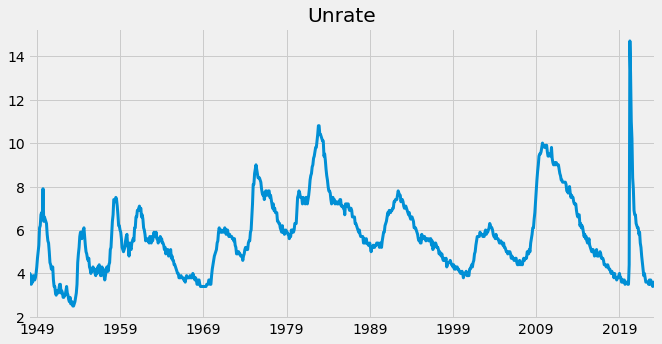

In [24]:
unrate.plot(figsize=(10,5),title='Unrate',lw=3)

# Filterting out the dataset to get the desired features

In [42]:
unemp_df=fred.search('unemployment rate state',filter=('frequency','Monthly'))
unemp_df=unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-05-26   2023-05-26   
LNS14000006            LNS14000006     2023-05-26   2023-05-26   
CAUR                          CAUR     2023-05-26   2023-05-26   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-05-26   2023-05-26   
FLUR                          FLUR     2023-05-26   2023-05-26   
...                            ...            ...          ...   
LNS14000029            LNS14000029     2023-05-26   2023-05-26   
CWSTUR                      CWSTUR     2023-05-26   2023-05-26   
CSOUUR                      CSOUUR     2023-05-26   2023-05-26   
LNS14000048            LNS14000048     2023-05-26   2023-05-26   
LNS14200000            LNS14200000     2023-05-26   2023-05-26   

                                                            title  \
series id                                                           
UNRATE                                          Unemployment Rate   
LNS14000006         Unemployment Rate - Black or African American   
CAUR                              Unemployment Rate in California   
M0892AUSM156SNBR              Unemployment Rate for United States   
FLUR                                 Unemployment Rate in Florida   
...                                                           ...   
LNS14000029       Unemployment Rate - 20 Yrs. & over, White Women   
CWSTUR                    Unemployment Rate in West Census Region   
CSOUUR                   Unemployment Rate in South Census Region   
LNS14000048                    Unemployment Rate - 25 Yrs. & over   
LNS14200000                   Unemployment Rate Part-Time Workers   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-04-01   Monthly               M   
LNS14000006             1972-01-01      2023-04-01   Monthly               M   
CAUR                    1976-01-01      2023-04-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
FLUR                    1976-01-01      2023-04-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000029             1954-01-01      2023-04-01   Monthly               M   
CWSTUR                  1976-01-01      2023-04-01   Monthly               M   
CSOUUR                  1976-01-01      2023-04-01   Monthly               M   
LNS14000048             1948-01-01      2023-04-01   Monthly               M   
LNS14200000             1968-01-01      2023-04-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
FLUR              Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000029       Percent           %  Seasonally Adjusted   
CWSTUR            Percent           %  Seasonally Adjusted   
CSOUUR            Percent           %  Seasonally Adjusted   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14200000       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-05-05 07:44:02-05:00   
LNS14000006                             SA  2023-05-05 07:44:07-05:00   
CAUR                                    SA  2023-05-23 09:16:01-05:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:0

In [65]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [66]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [67]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [68]:
px.line(uemp_states)

# pulling April 2020 unemp rate per state because of hike.

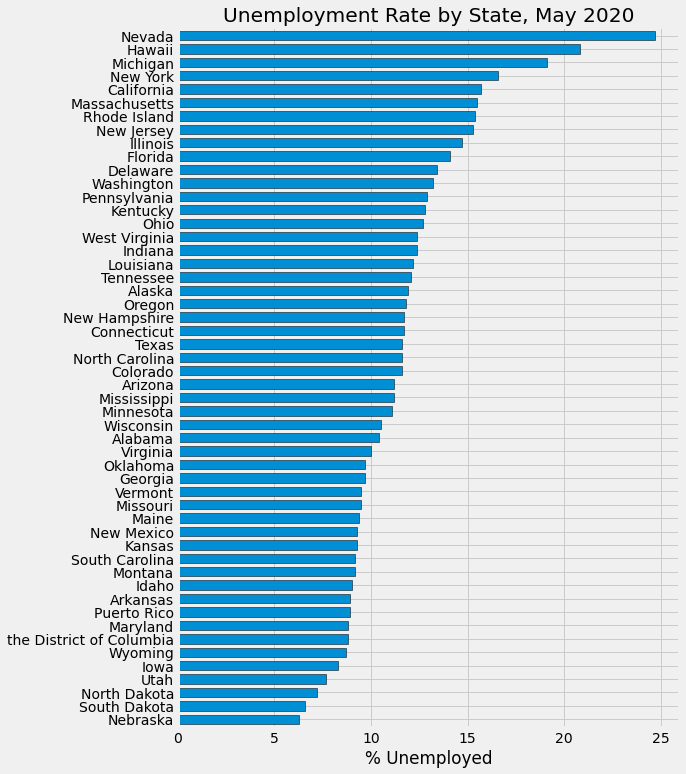

In [69]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pulling the participation rate 

In [71]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [72]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Let's Plot  Unemployment Vs Participation rate in New York!

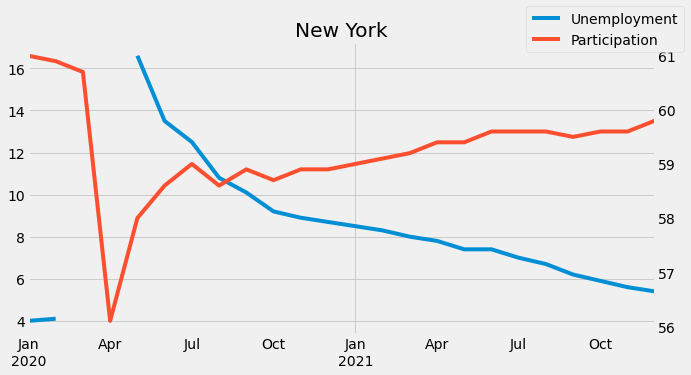

In [73]:
state = 'New York'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

# Plotting Unemployment Vs Participation rate for each state 

In [78]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

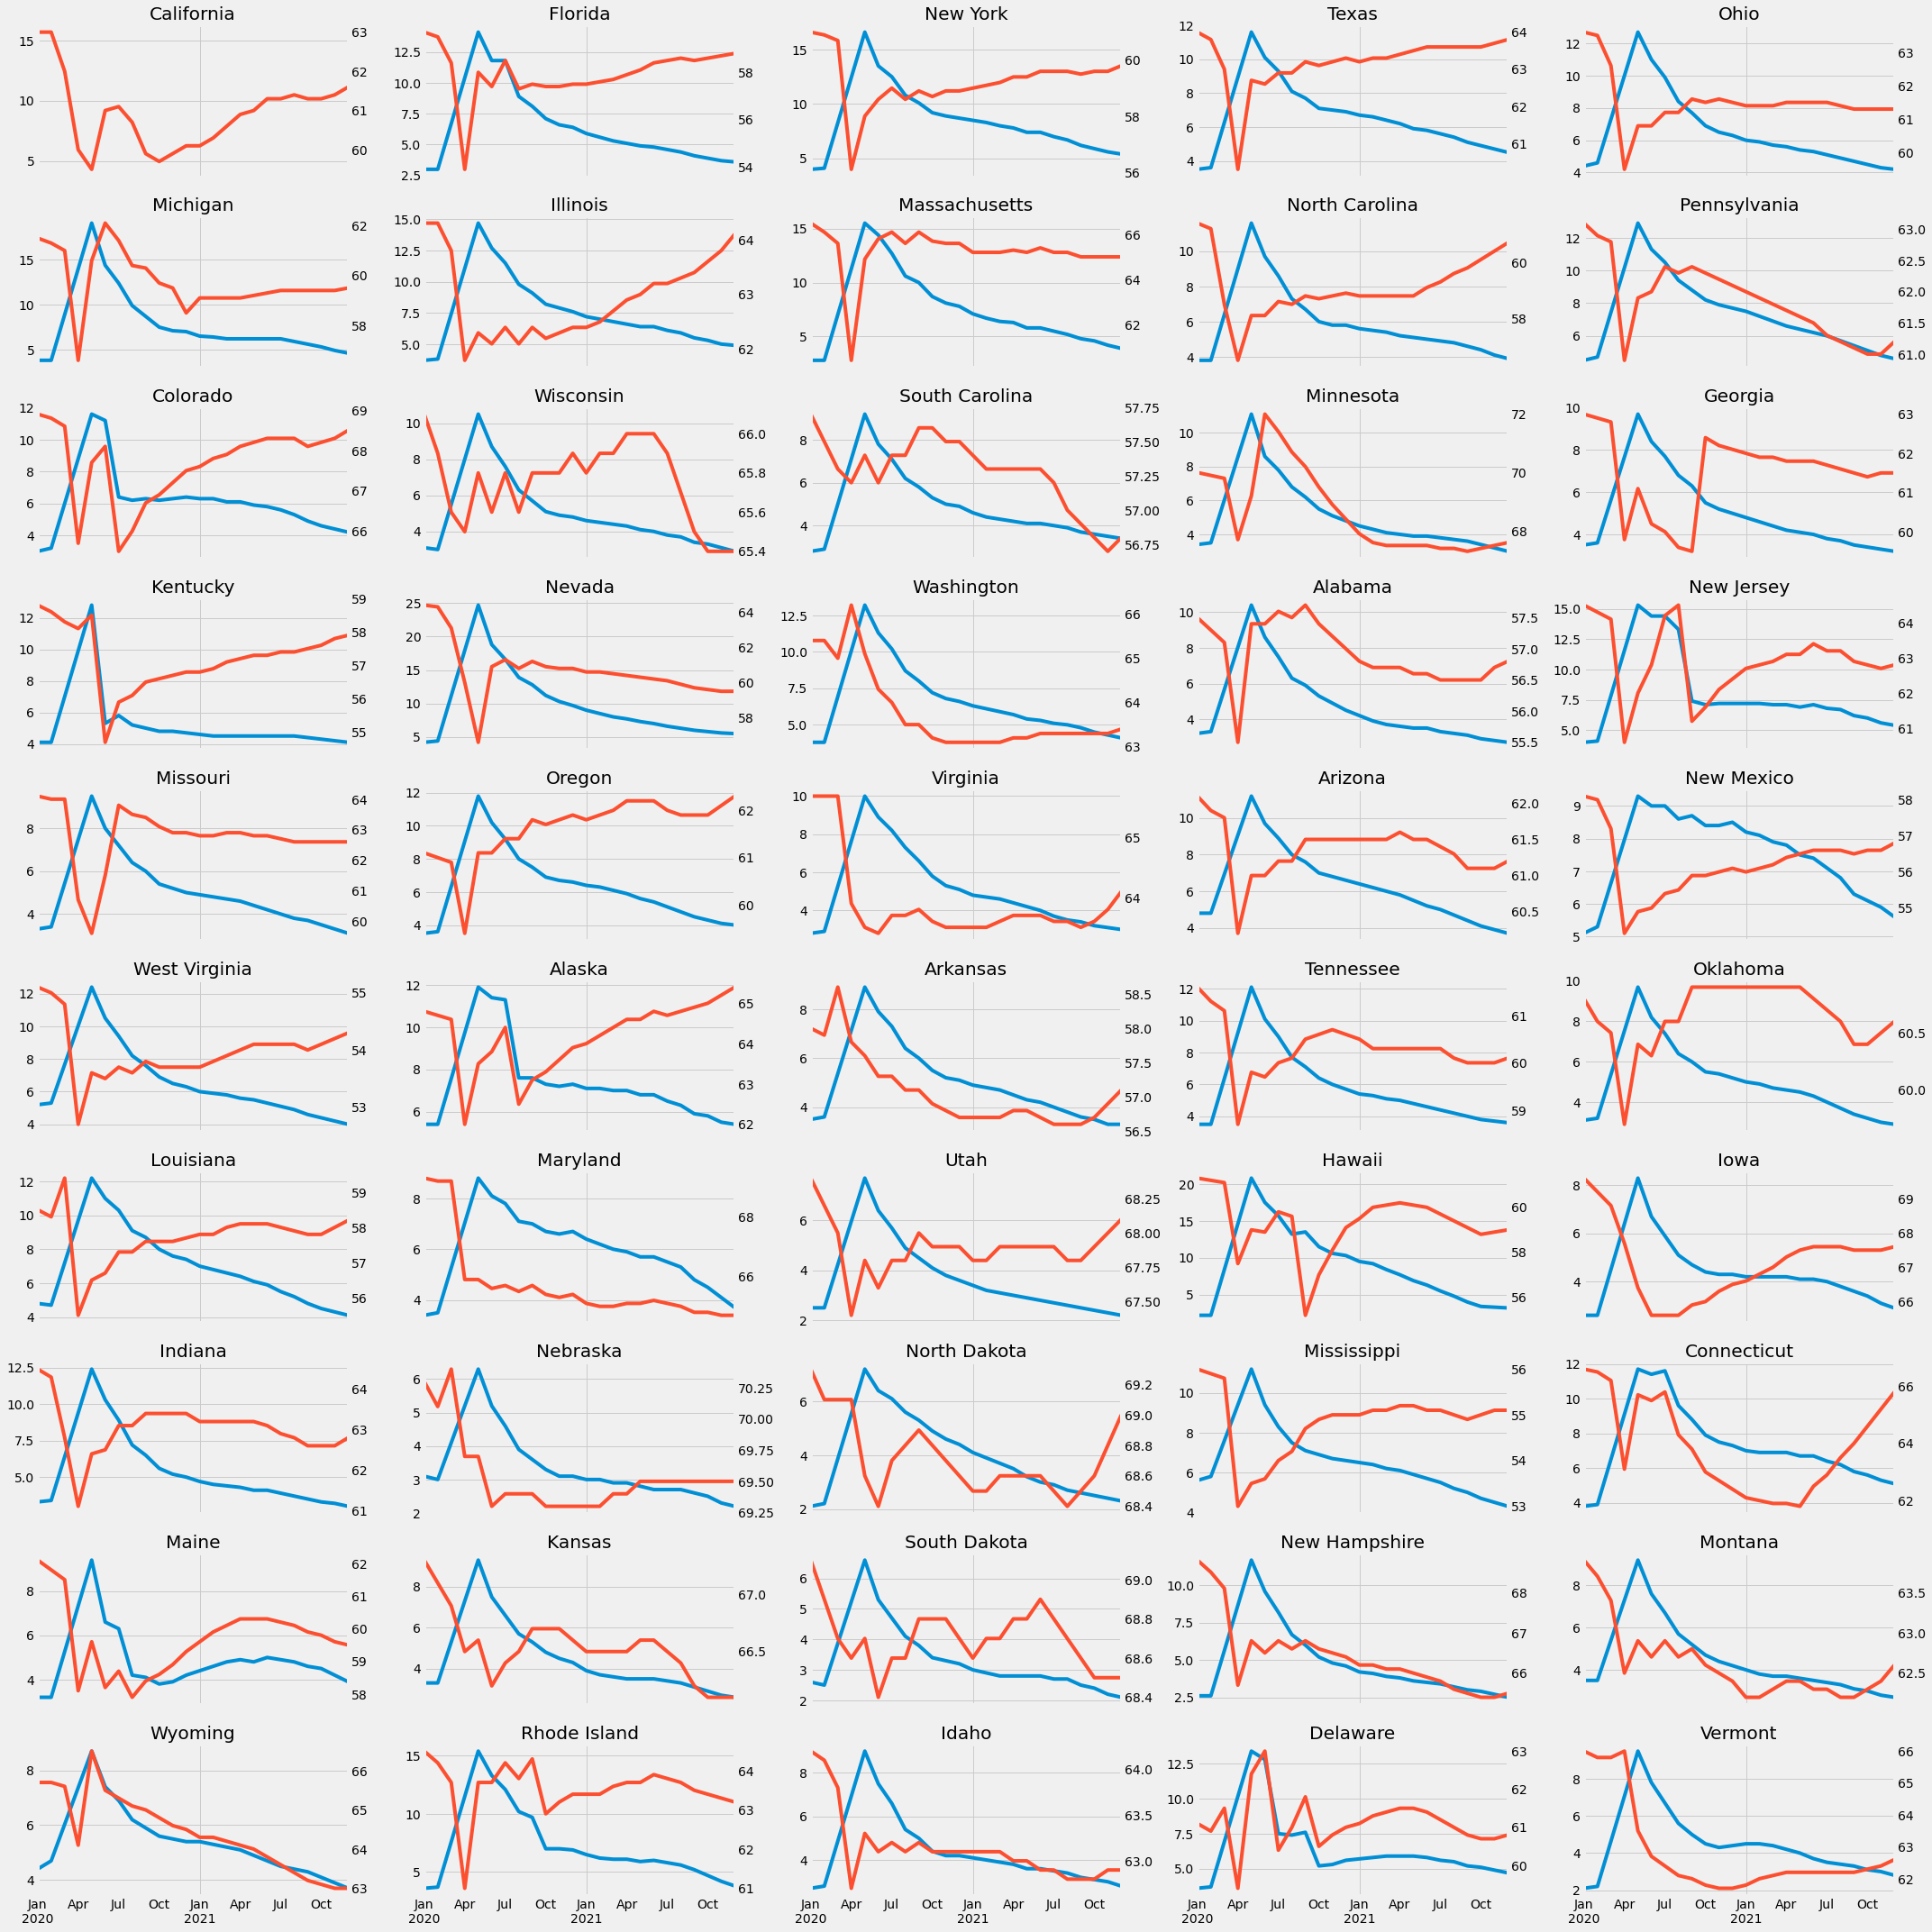

In [79]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()